<a href="https://colab.research.google.com/github/ZarakiKanzaki/project-lunar-ML/blob/main/ExploratoryDataAnalysisScryfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

### What's Scryfall?
Scryfall is a search engine for Magic cards. The website Scryfall.com was introduced on the World Wide Web in October 2016, claiming to be faster than similar sites. It also advertises as mobile-friendly, comprehensive, timely, and powerful. Subsequent development focused on expanding the database to include high-resolution scans and previously uncatalogued game features such as artwork, card backs, tokens, and extras.

In [49]:
!pip install requests
import requests
import json
from IPython.display import Image, display
from tabulate import tabulate
import pandas as pd

url = "https://api.scryfall.com/bulk-data/oracle_cards"

response = requests.get(url)




In [50]:
if response.status_code == 200:
    data = response.json()
    print(json.dumps(data.get("download_uri"), indent=2))



"https://data.scryfall.io/oracle-cards/oracle-cards-20231016090151.json"


In [51]:
    download_uri = data.get("download_uri")
    if download_uri:
        download_response = requests.get(download_uri)

        if download_response.status_code == 200:
            with open("bulk-files.json", "wb") as file:
                file.write(download_response.content)
            print("File downloaded successfully.")
        else:
            print(f"Failed to download file. Status code: {download_response.status_code}")
    else:
        print("No 'download_uri' found in the JSON data.")


File downloaded successfully.


The first thing we need to do with these bulk files is to clean them with pandas

In [88]:
df = pd.read_json("bulk-files.json")

df = df[df['border_color'] != 'silver ']
desired_categories = ['normal', 'saga', 'meld', "prototype", "transform", "split", "adventure", "flip", "modal_dfc", "leveler", "class"]
df = df[df['layout'].isin(desired_categories)]

df = df.drop(["oracle_id","multiverse_ids","mtgo_id","mtgo_foil_id","tcgplayer_id","cardmarket_id","released_at","uri","scryfall_uri","highres_image","image_status","image_uris","lang","cmc","colors","color_identity","legalities","reserved","foil","nonfoil","finishes","oversized","promo","games",
"reprint", "variation", "set_id", "set", "set_name", "set_type", "set_uri", "set_search_uri", "scryfall_set_uri", "rulings_uri", "prints_search_uri","collector_number","digital","rarity","card_back_id","artist","artist_ids","illustration_id","flavor_text",
"frame","full_art","textless","booster","story_spotlight","edhrec_rank","prices","related_uris","purchase_uris","security_stamp","preview","penny_rank","arena_id","all_parts","frame_effects","watermark","produced_mana","tcgplayer_etched_id","promo_types",
"life_modifier","hand_modifier","attraction_lights","color_indicator","content_warning"], axis=1)



In [53]:
df.head()

,object,id,name,layout,mana_cost,type_line,oracle_text,keywords,border_color,power,toughness,loyalty
0,card,86bf43b1-8d4e-4759-bb2d-0b2e03ba7012,Static Orb,normal,{3},Artifact,"As long as Static Orb is untapped, players can...",[],white,NaN,NaN,NaN
1,card,7050735c-b232-47a6-a342-01795bfd0d46,Sensory Deprivation,normal,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,[Enchant],black,NaN,NaN,NaN
2,card,e718b21b-46d1-4844-985c-52745657b1ac,Road of Return,normal,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,[Entwine],black,NaN,NaN,NaN
3,card,036ef8c9-72ac-46ce-af07-83b79d736538,Storm Crow,normal,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,[Flying],white,1,2,NaN
4,card,b125d1e7-5d9b-4997-88b0-71bdfc19c6f2,Walking Sponge,normal,{1}{U},Creature — Sponge,{T}: Target creature loses your choice of flyi...,[],black,1,1,NaN


In [54]:
df.describe()

,object,id,name,layout,mana_cost,type_line,oracle_text,keywords,border_color,power,toughness,loyalty
count,27449,27449,27449,27449,27064,27449,26821,27449,27449,14716,14716,291
unique,1,27449,27400,11,970,3064,25191,1973,4,29,32,11
top,card,86bf43b1-8d4e-4759-bb2d-0b2e03ba7012,Ineffable Blessing,normal,,Instant,,[],black,2,2,4
freq,27449,1,6,26641,1247,3027,335,14890,26275,4418,3667,104


## Card types

In Magic the Gathering we can identify two main tipes of Cards:


*   Permanents: As the name says, it's a group of cards that are going to stay on the battlefield until removed by specific effect.
Permanents types of cards contain:

            1. Creatures
            2. Artifacts
            3. Enchantments
            4. Lands
            5. Planeswalkers
            6. Battles


*   Non Permanents: It's a group of card that as they resolves they instantly go to the Graveyard. Non Permanents are:

            1. Sorceries
            2. Instants




### Permanent
> 110.1 <br> A permanent is a card or token on the battlefield. A permanent remains on the battlefield indefinitely. A card or token becomes a permanent as it enters the battlefield and it stops being a permanent as it’s moved to another zone by an effect or rule.


For more information about rulings about permanents, go to section [110](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A37%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C571%2C0%5D) of the Comprehensive rule. <br>
Now I'm going to provide an example foreach type of Permanent.

This is an example of a creature card, as almost all of the following cards (aside from planeswalker) it has a blank loyalty value. You can find more rulings about Creatures [here](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A118%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C375%2C0%5D).

In [78]:
url_images = 'https://api.scryfall.com/cards/named'
columns_to_display = ["name","layout","mana_cost","type_line","oracle_text", "power","toughness","loyalty"]

creature = requests.get(f"{url_images}?fuzzy=korvold+cursed&format=image&version=normal")

df[df['name']=='Korvold, Fae-Cursed King'][columns_to_display]

,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
18050,"Korvold, Fae-Cursed King",normal,{2}{B}{R}{G},Legendary Creature — Dragon Noble,"Flying\nWhenever Korvold, Fae-Cursed King ente...",4,4,NaN


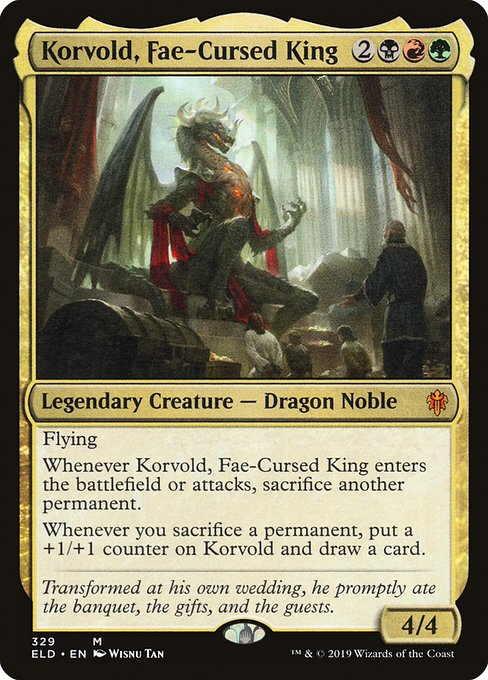

In [77]:
display(Image(data=creature.content))

This is an example of an Artifact. In this case you can have mixed types of Artifacts, in fact you can have Artifact creatures, so you'll have mixed values for P/T (from now on I'll use P/T for Power/Toughness). More about rulings at the section [301](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A116%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C522%2C0%5D) of the Comprehensive rules.



In [80]:
artifact = requests.get(f"{url_images}?fuzzy=sol+ring&format=image&version=normal")
df[df['name']=='Sol Ring'][columns_to_display]

,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
12426,Sol Ring,normal,{1},Artifact,{T}: Add {C}{C}.,NaN,NaN,NaN


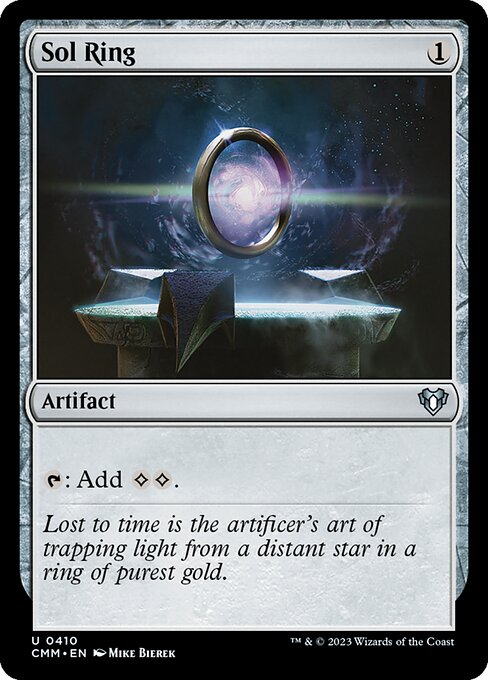

In [79]:
display(Image(data=artifact.content))

This is an example of Enchantment. As the same as Artifact, there can be some mixed data such as Echantment creatures. For more about Enchantments' rulings, see the section [303](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A120%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C571%2C0%5D) of the Comprehensive Rules.

In [81]:
enchantment = requests.get(f"{url_images}?fuzzy=doubling+season&format=image&version=normal")
df[df['name']=='Doubling Season'][columns_to_display]

,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
164,Doubling Season,normal,{4}{G},Enchantment,If an effect would create one or more tokens u...,NaN,NaN,NaN


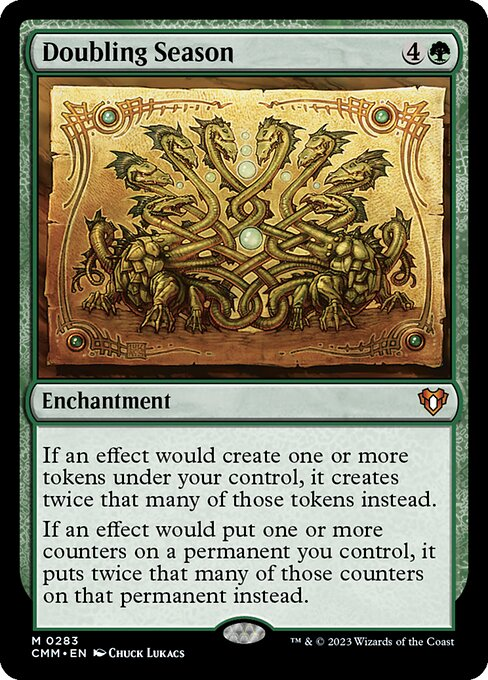

In [82]:
display(Image(data=enchantment.content))

This is an example of a land, for more information see section [305](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A124%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C651%2C0%5D) of the Comprehensive Rules.

In [132]:
land = requests.get(f"{url_images}?fuzzy=forest&format=image&version=normal&set=who")
df[df['name']=='Forest'][columns_to_display]

,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
20904,Forest,normal,,Basic Land — Forest,({T}: Add {G}.),NaN,NaN,NaN


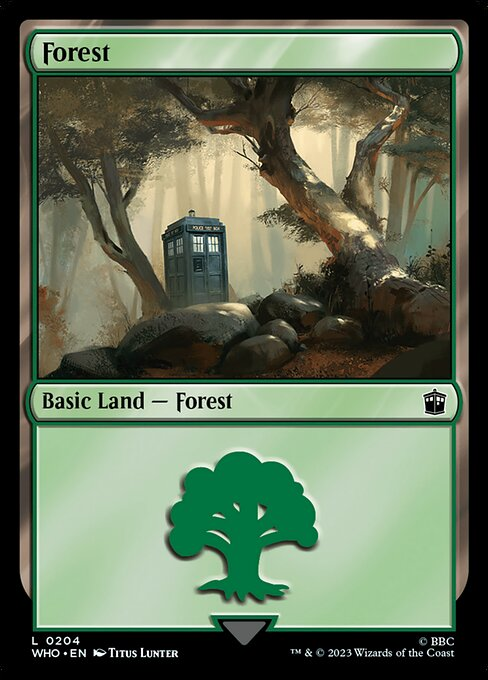

In [131]:
display(Image(data=land.content))

This is an example of Planeswalker, in this case some of the data is missing, expecially because this specific type of card doesn't have any Power nor Toughness. For rulings, see section [306](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A126%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C709%2C0%5D) of the Comprehensive Rules

In [133]:
planesawalker = requests.get(f"{url_images}?fuzzy=nissa+shadowed&format=image&version=normal")
df[df['name']=='Nissa of Shadowed Boughs'][columns_to_display]


,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
2568,Nissa of Shadowed Boughs,normal,{2}{B}{G},Legendary Planeswalker — Nissa,Landfall — Whenever a land enters the battlefi...,NaN,NaN,4


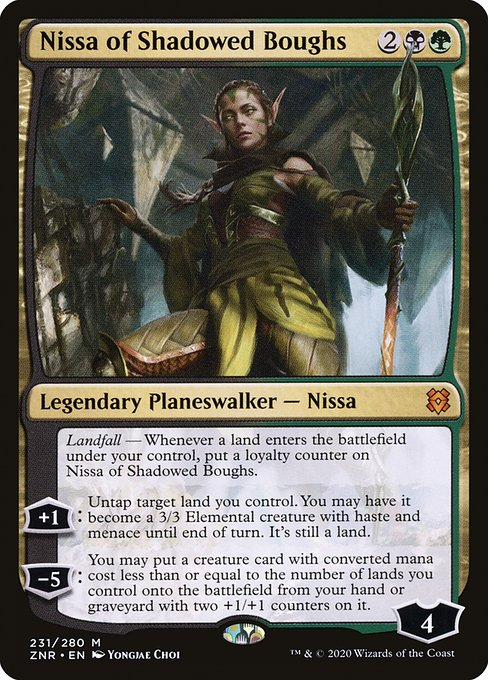

In [115]:
display(Image(data=planesawalker.content))

Here's an example of battle. This specific type of card was introduced in the expansion *War of the Machines*. For more information about Battles see the section [310](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A130%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C329%2C0%5D) of the Comprehensive rules.

In [128]:
battle_face_front = requests.get(f"{url_images}?fuzzy=invasion+azgol&format=image&version=normal")
battle_face_back = requests.get(f"{url_images}?fuzzy=ashen+reaper&format=image&version=normal&face=back")
battle_face = pd.concat([pd.DataFrame(x) for x in df[df['name'].str.contains('Invasion of Azgol', case=False, na=False)]['card_faces']],
    ignore_index=True)

battle_face = battle_face.drop(["object","artist", 'artist_id', 'illustration_id', 'image_uris', 'flavor_name', 'color_indicator', 'flavor_text'], axis=1 )
battle_face

,name,mana_cost,type_line,oracle_text,colors,defense,power,toughness
0,Invasion of Azgol,{B}{R},Battle — Siege,"(As a Siege enters, choose an opponent to prot...","[B, R]",4,NaN,NaN
1,Ashen Reaper,,Creature — Zombie Elemental,"Menace\nAt the beginning of your end step, put...","[B, R]",NaN,2,1


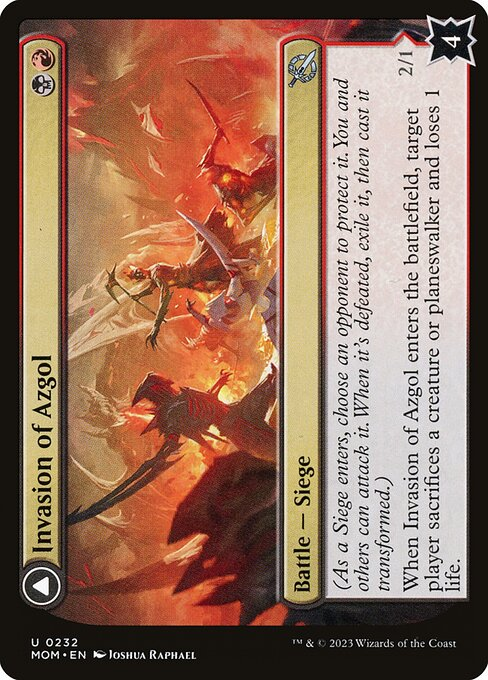

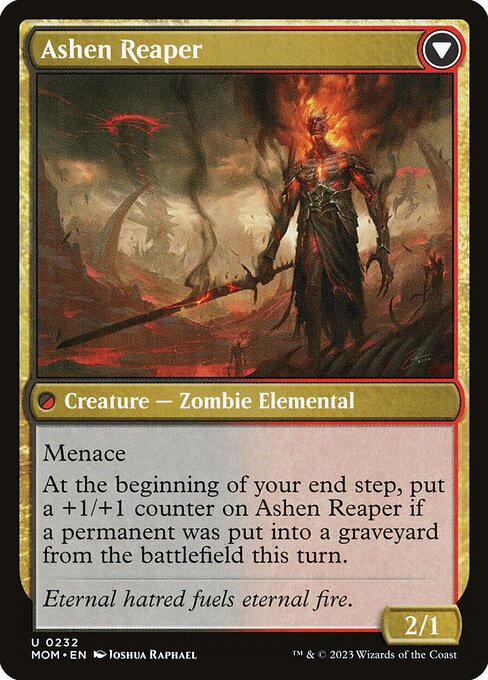

In [155]:
display(Image(data=battle_face_front.content))
display(Image(data=battle_face_back.content))

### Instants and sorceries (Non Permanents)
Instants, like sorceries, represent one-shot or short-term magical spells. They are never put onto the battlefield; instead, they take effect when their mana cost is paid and the spell resolves, and then are immediately put into the player's graveyard.
The difference between the two is defined by their speed, in fact, Sorceries can be cast only during the main phases, while instant could be cast at any time.


> 610.1. <br> A one-shot effect does something just once and doesn’t have a duration. Examples include
dealing damage, destroying a permanent, creating a token, and moving an object from one zone to
another.


Here is an example of instant, for more information see section [304](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A122%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C260%2C0%5D) of the Comprehensive rules.

In [143]:
instant = requests.get(f"{url_images}?fuzzy=growth+spiral&format=image&version=normal&set=who")
df[df['name']=='Growth Spiral'][columns_to_display]

,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
6050,Growth Spiral,normal,{G}{U},Instant,Draw a card. You may put a land card from your...,NaN,NaN,NaN


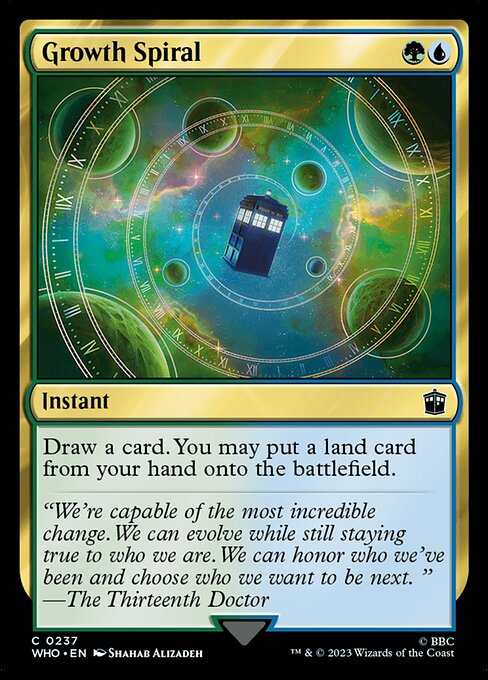

In [145]:
display(Image(data=instant.content))

Here is an example of Sorcery, for more information see section [307](https://media.wizards.com/2023/downloads/MagicCompRules%2020231013.pdf#%5B%7B%22num%22%3A126%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C88%2C145%2C0%5D) of the Comprehensive rules.

In [148]:
sorcery = requests.get(f"{url_images}?fuzzy=explore&format=image&version=normal&set=sld")
df[df['name']=='Explore'][columns_to_display]

,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
21532,Explore,normal,{1}{G},Sorcery,You may play an additional land this turn.\nDr...,NaN,NaN,NaN


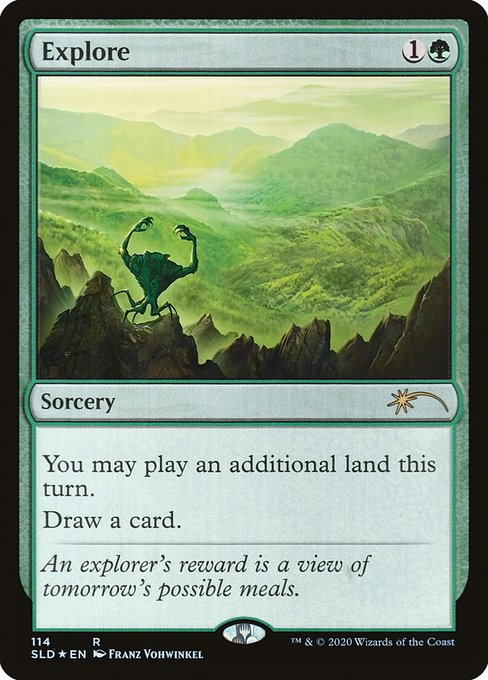

In [151]:
display(Image(data=sorcery.content))

## Card Frame
Let's print out what kind of layout, so we can see visually how is a specific layout

In [150]:
unique_layout = df['layout'].unique()
print(unique_layout)

['normal' 'saga' 'meld' 'prototype' 'transform' 'split' 'adventure' 'flip'
 'modal_dfc' 'leveler' 'class']


### Normal Frame
In this case see any cards above (except for battles).

### Sagas
Saga is an enchantment type introduced in *Dominaria*. Each Saga tells the story of a key event from the past as it unfolds during each of your turns.Each separate step in the story is called a chapter, and is marked by a roman numeral (I, II, III, etc.). Saga cards are historic.

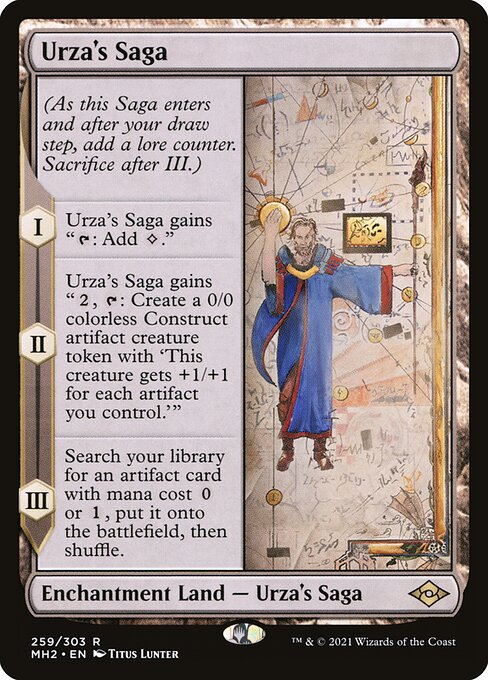

In [161]:
saga = requests.get(f"{url_images}?fuzzy=urza+saga&format=image&version=normal")
display(Image(data=saga.content))

### Meld
Meld is a keyword action that means to turn two meld cards on the back side into one oversized card, if you control the proper pair. It was introduced in *Eldritch Moon* with three pairs. Meld returned with three more meld pairs in *The Brothers' War*.

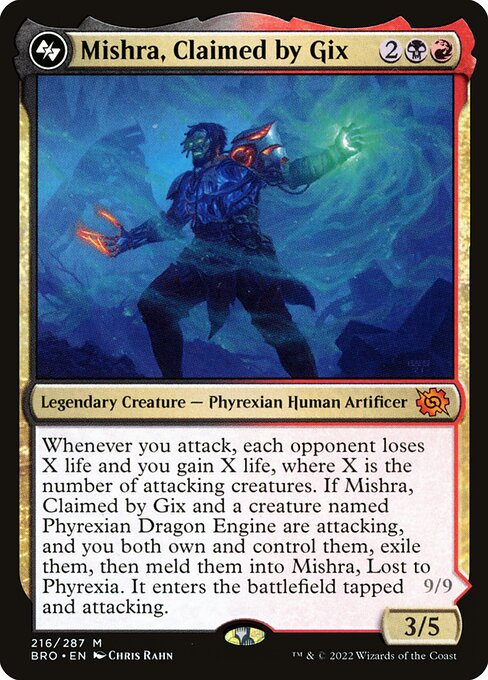

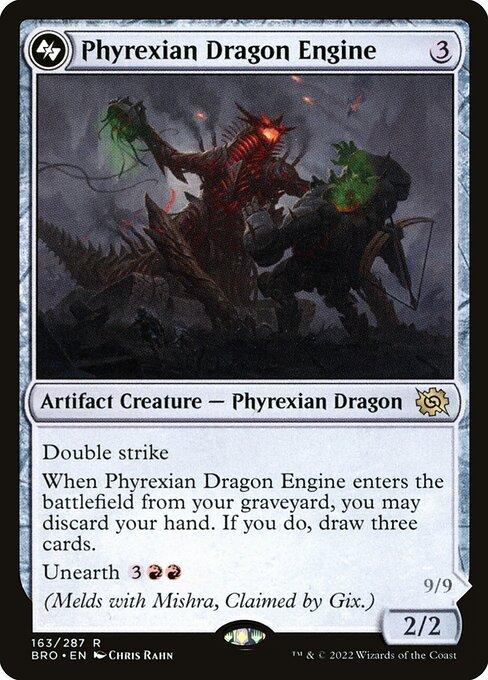

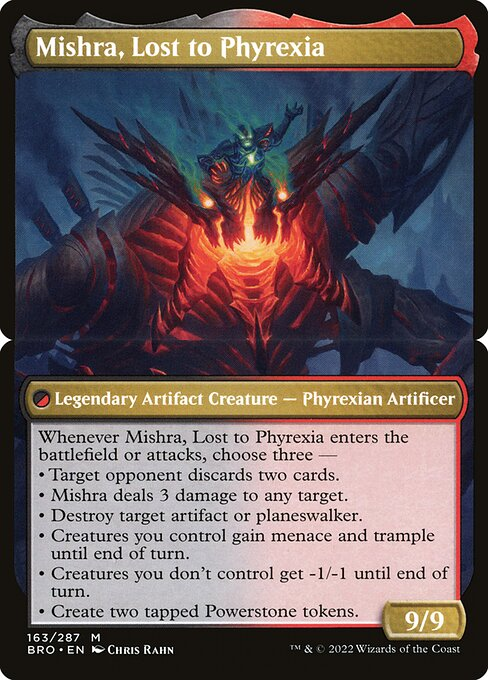

In [153]:
meld_face_1 = requests.get(f"{url_images}?fuzzy=mishra+claimed&format=image&version=normal")
meld_face_2 = requests.get(f"{url_images}?fuzzy=phyrexian+dragon+engine&format=image&version=normal")
meld_huge = requests.get(f"{url_images}?fuzzy=mishra+lost&format=image&version=normal")
display(Image(data=meld_face_1.content))
display(Image(data=meld_face_2.content))
display(Image(data=meld_huge.content))

### Prototype

Prototype is a keyword ability introduced in *The Brothers' War* which allows an alternate version of a card to be cast for less than its normal mana cost. It is unique to artifacts and artifact creatures. Each prototype card has two sets of characteristics:

    1. Its default mana cost, power, and toughness – printed in their normal positions on the card. The mana cost is entirely colorless and greater than 4.
    2. A secondary set of color, mana cost, power and toughness printed in the prototype ability.

In [158]:
prototype = requests.get(f"{url_images}?fuzzy=arcane+proxy&format=image&version=normal")
df[df['name']=='Arcane Proxy'][columns_to_display]


,name,layout,mana_cost,type_line,oracle_text,power,toughness,loyalty
14111,Arcane Proxy,prototype,{7},Artifact Creature — Wizard,Prototype {1}{U}{U} — 2/1 (You may cast this s...,4,3,NaN


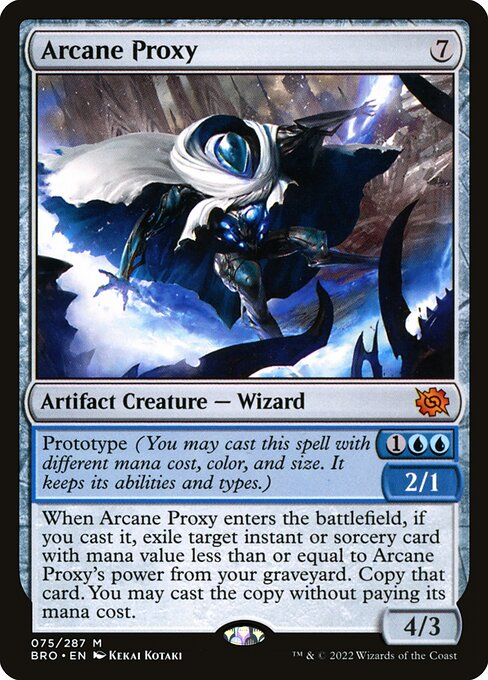

In [159]:
display(Image(data=prototype.content))

### Split Card
Split cards are Magic cards with two card faces on the front side. A split card is literally "split" into two separate cards each with its card name, art, mana cost, text, etc. Split cards can only be instants and sorceries, not permanents.


Regular split cards are named with a ”__________ and __________“ convention while Aftermath cards use a ”__________ to __________“ convention. In *Guilds of Ravnica*, the card halves have alliterative names, starting with the same three letters.

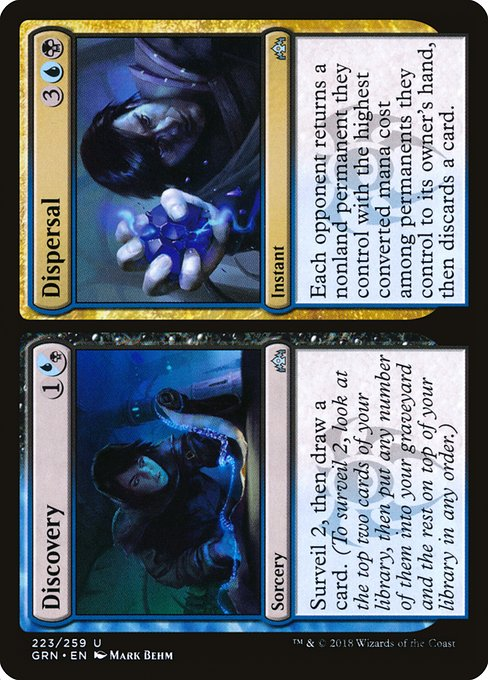

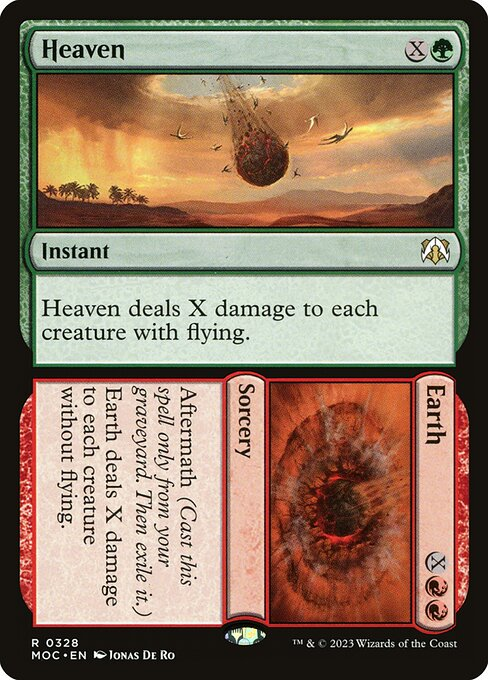

In [160]:
split1 = requests.get(f"{url_images}?fuzzy=discovery+dispersal&format=image&version=normal")
split2 = requests.get(f"{url_images}?fuzzy=heaven+earth&format=image&version=normal")
display(Image(data=split1.content))
display(Image(data=split2.content))

### Adventures
Adventure is a spell type, a subtype seen on instants and sorceries attached to permanent cards, primarily appearing on creatures. It was introduced in *Throne of Eldraine*. Permanents with Adventures are called adventurer cards in the rules, and are referred to as cards that "have an Adventure" when this attribute is significant to other cards.

Initially, Adventures only appeared on creature cards, though the rules did not specify any type restrictions. As such, they could, and eventually did, appear on other permanent types. They currently appear on artifacts and enchantments in addition to creatures.

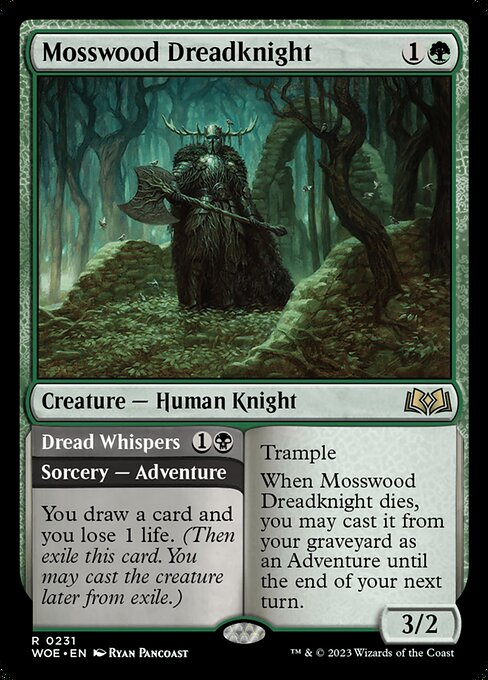

In [163]:
adventure = requests.get(f"{url_images}?fuzzy=mosswood&format=image&version=normal&set")
display(Image(data=adventure.content))

## Other


In [12]:
unique_type = df['type_line'].unique()
print(unique_type)

['Artifact' 'Enchantment — Aura' 'Sorcery' ...
 'Enchantment Creature — Fish' 'Legendary Creature — Alien Cleric'
 'Legendary Creature — Minotaur Cleric']


In [ ]:
planeswalker = df[df['type_line'].str.contains('Planeswalker', case=False, na=False)]
planeswalker.head()

,object,id,name,layout,mana_cost,type_line,oracle_text,keywords,border_color,power,toughness,loyalty
259,card,222a736e-d819-452d-aeda-eb848c4b2302,"Tamiyo, Compleated Sage",normal,{2}{G}{G/U/P}{U},Legendary Planeswalker — Tamiyo,"Compleated ({G/U/P} can be paid with {G}, {U},...",[Compleated],black,NaN,NaN,5
461,card,64e6a8d1-ae75-45bd-af62-9a622620cb5c,"Jace, the Perfected Mind",normal,{2}{U}{U/P},Legendary Planeswalker — Jace,Compleated ({U/P} can be paid with {U} or 2 li...,"[Mill, Compleated]",black,NaN,NaN,5
574,card,6a5a6f7b-149d-46d3-9814-d38a302db17c,"Huatli, Dinosaur Knight",normal,{4}{R}{W},Legendary Planeswalker — Huatli,+2: Put two +1/+1 counters on up to one target...,[],black,NaN,NaN,4
602,card,7be5b866-d479-4698-98b2-87a973f6b8f6,"Zariel, Archduke of Avernus",normal,{2}{R}{R},Legendary Planeswalker — Zariel,+1: Creatures you control get +1/+0 and gain h...,[],black,NaN,NaN,4
613,card,10e0d47d-b13c-4d48-881f-8aaa347ef209,"Jiang Yanggu, Wildcrafter",normal,{2}{G},Legendary Planeswalker — Yanggu,Each creature you control with a +1/+1 counter...,[],black,NaN,NaN,3


In [37]:
print("Number of Unique elements in the DataFrame:", df['name'].value_counts)

Number of Unique elements in the DataFrame: <bound method IndexOpsMixin.value_counts of 0                                    Static Orb
1                           Sensory Deprivation
2                                Road of Return
3                                    Storm Crow
4                                Walking Sponge
                          ...                  
29952                          Without Weakness
29953                   Firesong and Sunspeaker
29954    Toralf, God of Fury // Toralf's Hammer
29955                         Samut, the Tested
29956                              Sinew Sliver
Name: name, Length: 27449, dtype: object>
